## Data Analysis

In [121]:
import os
import pandas as pd

data_path = "../data/"
all_files = os.listdir(data_path)
measurements = []

camera_path = ""
world_path = ""
trajectory_path = ""

for file in all_files:

    if file.startswith("meas"):
        measurements.append(file)

    if file.startswith("world"):
        world_path = file

    if file.startswith("camera"):
        camera_path = file

    if file.startswith("traj"):
        trajectory_path = file

world_file = pd.read_table(data_path + world_path)
trajectory_file = pd.read_table(data_path + trajectory_path)


## Measurement File

In [122]:
measurements.sort()

measurement_file = pd.read_table(data_path + measurements[0])
x = measurement_file.iloc[2,0]
for m in measurements:
    
    file = pd.read_table(data_path + m)
    lines = file.iloc[:,0].tolist()

    for line in lines[2:]:
        line = line.split()

        if float(line[-1]) > 480:
            print("Error")

        if float(line[-2]) > 640:
            print("Error")

# This was just a little check to verify if i understood what "measurements" was returning. Since no "Error" are printed, it means that it returns pixel values.

"""   

seq: measurement number
gt_pose: where the robot should be
odom_pose: where we think the robot is
point: first measured landmark | n-th landmark | seen at (u,v) 
point: second measured landmark | n-th landmark | seen at (u,v) 
point: third measured landmark | n-th landmark | seen at (u,v) 
point: fourth measured landmark | n-th landmark | seen at (u,v) 
...

"""

'   \n\nseq: measurement number\ngt_pose: where the robot should be\nodom_pose: where we think the robot is\npoint: first measured landmark | n-th landmark | seen at (u,v) \npoint: second measured landmark | n-th landmark | seen at (u,v) \npoint: third measured landmark | n-th landmark | seen at (u,v) \npoint: fourth measured landmark | n-th landmark | seen at (u,v) \n...\n\n'

## Camera File

In [123]:
camera_file = pd.read_table(data_path + camera_path)

camera_file_m = camera_file.iloc[0:3,0].to_string().split()
camera_file_t = camera_file.iloc[4:8,0].to_string().split()

camera_file_m = [float(i) for i in camera_file_m]
camera_file_m.pop(0)
camera_file_m.pop(3)
camera_file_m.pop(6)
camera_matrix = []
camera_matrix.append(camera_file_m[:3])
camera_matrix.append(camera_file_m[3:6])
camera_matrix.append(camera_file_m[6:9])
print(f"Camera Matrix: {camera_matrix}")

camera_file_t= [float(i) for i in camera_file_t]
camera_file_t.pop(0)
camera_file_t.pop(4)
camera_file_t.pop(8)
camera_file_t.pop(12)
camera_transform = []
camera_transform.append(camera_file_t[:4])
camera_transform.append(camera_file_t[4:8])
camera_transform.append(camera_file_t[8:12])
camera_transform.append(camera_file_t[12:16])
print(f"Camera Transform: {camera_transform}")

Camera Matrix: [[180.0, 0.0, 320.0], [0.0, 180.0, 240.0], [0.0, 0.0, 1.0]]
Camera Transform: [[0.0, 0.0, 1.0, 0.2], [-1.0, 0.0, 0.0, 0.0], [0.0, -1.0, 0.0, 0.0], [0.0, 0.0, 0.0, 1.0]]


## Trajectory File

In [124]:
pos = []
new_pos = []

odometry = []
gt = []

for i in range(199):
    pos.append(trajectory_file.iloc[i,:].tolist())

for j in range(len(pos)):
    new_pos.append(pos[j][0].split())

for h in range(len(new_pos)):
    for k in range(len(new_pos[h])):
        new_pos[h][k] = float(new_pos[h][k])

    odometry.append(new_pos[h][1:4])
    gt.append(new_pos[h][4:7])

odometry.insert(0, [0.00160159, 0, -0.000259093])
gt.insert(0, [0, 0, 0])

print(odometry)
print(gt)


[[0.00160159, 0, -0.000259093], [0.199821, 0.00162541, 0.0137885], [0.406303, 0.00584173, 0.0260892], [0.605706, 0.0106708, 0.0211059], [0.820184, 0.0112369, 0.00255117], [1.01217, 0.0102473, -0.0182592], [1.19928, 0.00582261, -0.0295553], [1.40395, -5.74928e-05, -0.0310823], [1.59877, -0.00626311, -0.0307752], [1.78719, -0.0122228, -0.0236181], [1.98683, -0.0178444, -0.0365003], [2.19729, -0.0226588, -0.0140135], [2.4091, -0.0258724, -0.0194001], [2.6066, -0.0312996, -0.0374593], [2.82054, -0.0447542, -0.090531], [3.02268, -0.0664734, -0.126053], [3.21574, -0.0937795, -0.160416], [3.43236, -0.133871, -0.20976], [3.62734, -0.1787, -0.24864], [3.80101, -0.228089, -0.296675], [3.98542, -0.290657, -0.355072], [4.15209, -0.359208, -0.434882], [4.34116, -0.453249, -0.492824], [4.5336, -0.562997, -0.549557], [4.7071, -0.675202, -0.605752], [4.86763, -0.793975, -0.662431], [5.02726, -0.927672, -0.721112], [5.1857, -1.07148, -0.781621], [5.31402, -1.20609, -0.838411], [5.44807, -1.36335, -0.90

## World File

In [125]:
landmarks = []
new_landmarks = []

landmark_positions = []

for i in range(999):
    landmarks.append(world_file.iloc[i,:].tolist())

for j in range(len(landmarks)):
    new_landmarks.append(landmarks[j][0].split())

for h in range(len(new_landmarks)):
    for k in range(len(new_landmarks[h])):
        new_landmarks[h][k] = float(new_landmarks[h][k])

    landmark_positions.append(new_landmarks[h][1:4])

landmark_positions.insert(0, [6.80375, -2.11234, 1.1324 ])

print(landmark_positions)

[[6.80375, -2.11234, 1.1324], [0.268018, 9.04459, 1.66478], [-7.40419, -7.82382, 1.9957], [5.42715, 0.534899, 1.07966], [-6.15572, 3.26454, 1.56093], [0.795207, -2.49586, 1.04099], [2.79958, -2.91903, 0.751446], [1.7728, 3.14608, 1.43471], [-7.0468, 7.62124, 0.564322], [-1.66997, -6.60786, 1.62722], [-4.11679, -5.35477, 0.337954], [0.431267, -6.47579, 1.03975], [-8.60187, -5.9069, 0.154318], [-8.91885, 7.4108, 1.71068], [1.5886, -0.948483, 0.74955], [4.95606, 6.66477, 1.70151], [7.77897, -8.46011, 0.598828], [3.02264, 0.21372, 1.88586], [-1.30973, -9.93537, 0.620228], [-9.18271, -1.72033, 0.783935], [8.41829, 3.69513, 0.612521], [1.86423, 3.33113, 0.844889], [9.17274, 8.37861, 1.05949], [0.960841, -4.05423, 1.61973], [-0.080452, -4.17893, 1.27832], [-7.57482, -7.23523, 0.55823], [2.17766, -4.82188, 1.39508], [-4.69077, 3.17493, 1.04711], [-5.11346, -3.47973, 0.91744], [-7.70664, 7.3107, 0.884023], [-3.96474, 3.1424, 1.23638], [0.597985, 1.90091, 0.552333], [-8.5982, -8.02325, 1.69491],

## Plot without landmarks

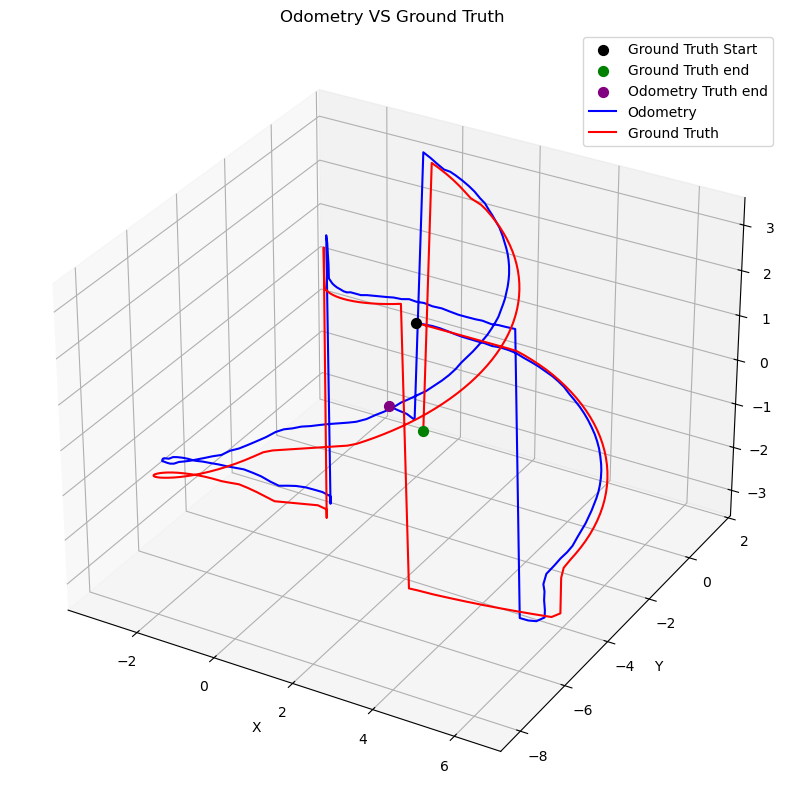

In [126]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # only needed for older matplotlib

ground_truth_starting_point = gt[0]
ground_truth_ending_point = gt[-1]

odometry_ending_point = odometry[-1]

x_odometry, y_odometry, z_odometry = zip(*odometry)  # returns 3 tuples
x_gt, y_gt, z_gt = zip(*gt)

fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(ground_truth_starting_point[0], ground_truth_starting_point[1], ground_truth_starting_point[2], color='black', s=50, label='Ground Truth Start', marker='o')
ax.scatter(ground_truth_ending_point[0], ground_truth_ending_point[1], ground_truth_ending_point[2], color='green', s=50, label='Ground Truth end', marker='o')
ax.scatter(odometry_ending_point[0], odometry_ending_point[1], odometry_ending_point[2], color='purple', s=50, label='Odometry Truth end', marker='o')

ax.plot(x_odometry, y_odometry, z_odometry, label='Odometry', color='blue')
ax.plot(x_gt, y_gt, z_gt, label='Ground Truth', color='red')


ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Odometry VS Ground Truth ')
ax.legend()

plt.show()


## Plot with landmarks

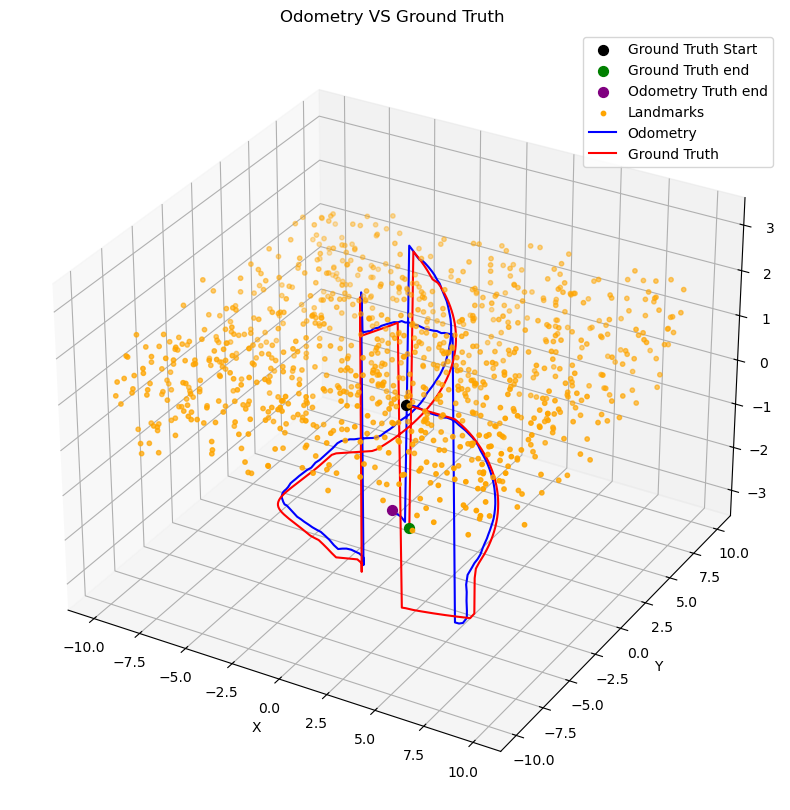

In [127]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # only needed for older matplotlib

ground_truth_starting_point = gt[0]
ground_truth_ending_point = gt[-1]

odometry_ending_point = odometry[-1]

x_odometry, y_odometry, z_odometry = zip(*odometry)  # returns 3 tuples
x_gt, y_gt, z_gt = zip(*gt)
x_l, y_l, z_l = zip(*landmark_positions)

fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(ground_truth_starting_point[0], ground_truth_starting_point[1], ground_truth_starting_point[2], color='black', s=50, label='Ground Truth Start', marker='o')
ax.scatter(ground_truth_ending_point[0], ground_truth_ending_point[1], ground_truth_ending_point[2], color='green', s=50, label='Ground Truth end', marker='o')
ax.scatter(odometry_ending_point[0], odometry_ending_point[1], odometry_ending_point[2], color='purple', s=50, label='Odometry Truth end', marker='o')

ax.scatter(x_l, y_l, z_l , color='orange', s=10, label='Landmarks', marker='o')

ax.plot(x_odometry, y_odometry, z_odometry, label='Odometry', color='blue')
ax.plot(x_gt, y_gt, z_gt, label='Ground Truth', color='red')


ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Odometry VS Ground Truth ')
ax.legend()

plt.show()
